##### 【問題1】断面図の作成

前述の断面図をMatplotlibを使い作成してください。x=136の地点の赤い点や矢印も表示させてください。
これ以降の問題では下りる過程の可視化を行いますが、その際にはこの断面図を活用してください

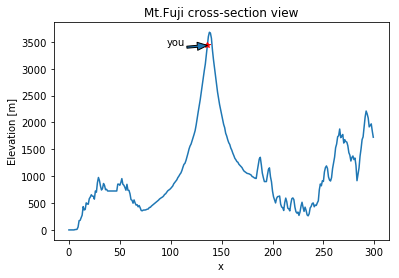

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji_data = np.loadtxt("week2_session_mtfuji_data.csv",delimiter=",", skiprows=1)

fuji_elevation = fuji_data[:,3]

plt.title('Mt.Fuji cross-section view')
plt.plot(fuji_elevation)
plt.xlabel('x')
plt.ylabel('Elevation [m]')

marker_x = 136
plt.plot(marker_x, fuji_elevation[marker_x], color="Red", marker="*")
plt.annotate('you', xy=(marker_x, fuji_elevation[marker_x]), xytext=(marker_x-40, fuji_elevation[marker_x]+1), arrowprops=dict(shrink=0,width=2,headwidth=8,headlength=10))

##### 【問題2】勾配の計算の関数
授業前課題では各地点での勾配を最初に求めました。しかし、暗闇の富士山の比喩を考えると、知ることができるのはあなたがいる地点の勾配だけです。
ここでは「あなたが今いる地点x」と「その隣の地点x-1」の関係による勾配を求める関数を作成しましょう。この関数が返す値を「今いる地点の勾配」として次の問題で作成する関数内で使ってください。
勾配は授業前課題で行ったように、以下の計算で求まります

In [9]:
# calculation gradient from xy_list and variable_x
def cal_gradient(x, xy_array):
    """
    Parameter
    -------------------
    x: position x (1st colmun in week2_session_mtfuji_data.csv)
    xy_array: array of x & elevation (1st & 4th colmun in week2_session_mtfuji_data.csv)
    
    return
    -------------------
    grad: gradient at x (cal by (y-y[x-1])/(x-x-1))
          if x=0, return NONE
    """
    x=1 if x == 0 else x #x=0の場合x=1として計算
    
    if 0 < x:
        y = xy_array[x,1]
        y_prev = xy_array[x-1,1]
        x_prev = x-1
        grad = (y-y_prev)/(x-x_prev)
        return grad
    else: #x<0の場合計算できないのでNoneを返す
        print('X<0 out of range')
        return None

#Call function
POINT_X = 136
xy_array = np.delete(fuji_data,[1,2,4], axis=1)    #Extract x & elevation (1st & 4th colmun) from the csv 
print("X={}の時、勾配={:.2f}".format(POINT_X, cal_gradient(POINT_X, xy_array)))

X=136の時、勾配=168.35


##### 【問題3】勾配降下法の関数を作成
授業前課題では説明までとした勾配降下法ですが、これを行う関数を作成してください。
数式で表すと 「移動すべき地点 = 今いる地点 - 
α
 ×今いる地点の勾配」 となります。
この関数を使い、あなたが今いるxが136の地点（標高3434.59[m]）から、山を下っていきましょう。移動毎の標高はリストに記録し、その過程を可視化してください。断面図を目視したり、読み込んだ数値を確認して分かることと比べてどうなっているでしょうか。
実装上の注意
移動すべき地点は基本的には少数となりますが、勾配の情報は整数値の場所でしか得られません。そのため、四捨五入により整数値に変換する必要があります。
可視化のヒント
断面図の中に点を表示したり、繰り返し毎の標高や勾配を折れ線グラフで見てみることができます。
α
 の補足
α
 は0より大きい任意の値をとるハイパーパラメータです。機械学習の分野では学習率という名前で呼ばれます。この値によって下り方が変わりますから、関数の引数にしてください。複数試し、うまく下りられる 
α
 の値を見つけましょう。
初期値の補足
最初に居たx=136の地点のことを初期値と呼びます。この初期値によってどこに下っていくかが変わりますから、これも関数の引数にしてください。

初期値=136、Alpha=0.18の時、最小値:(x=75.0 y=371.19) (計算回数:12)


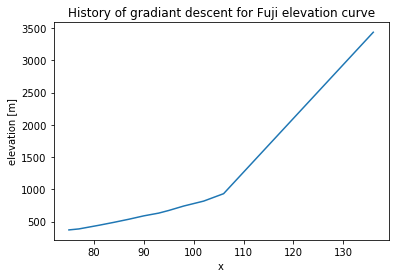

In [3]:
import math

ALPHA = 0.18    #勾配降下法　パラメータα
X_INIT = 136    #勾配降下法　x初期値 
MAX_LOOP_COUNT = 1000    #勾配降下法　最大計算回数

def rounding_float_to_int(value):
    """
    少数を整数に四捨五入する
    
    parameter
    ------------------
    value :float Rounding target data
    
    return
    ------------------
    value_int:int Rounded data
    """
    
    value_float, value_int = math.modf(value)
    if 0.5 <= value_float:
        value_int+=1

    return int(value_int)


def cal_gradiant_descent(x_init, alpha, xy_list, max_loop_count):
    """
    勾配降下法を用いてxy_listから最小値を計算し計算の履歴を返す。
    
    paramter
    ----------------
    x_init : int
    alpha : float
    xy_list : Nx2 data array
    
    return
    ----------------
    nparray_cal_history : numpy array [x, y_grad(x), y(x)]
    """
    x = x_init
    nparray_cal_history = np.empty((1,3))
    """ 勾配から次のxを計算 & 結果をcal hisotryにappend """
    for loop_count in range(0, max_loop_count):    
        y_grad = cal_gradient(x, xy_list) 
        x_next = rounding_float_to_int(x - y_grad*alpha)
 
        if loop_count == 0:
            nparray_cal_history = [[x, y_grad, xy_list[x,1]]]
        else:
            nparray_cal_history = np.concatenate([nparray_cal_history, np.array([[x, y_grad, xy_list[x,1]]])])
        
        """ ループを抜ける条件 1.勾配が0 or 2.xの値が更新されない場合 or 3.xが0以下（計算できないため）"""
        if y_grad == 0 or x == x_next or x < 0:
            break
        
        x=x_next
        
    return nparray_cal_history


#call function
history = cal_gradiant_descent(X_INIT, ALPHA, xy_array, MAX_LOOP_COUNT)
print("初期値={}、Alpha={}の時、最小値:(x={} y={}) (計算回数:{})".format(X_INIT, ALPHA, history[-1,0], history[-1,2], history.shape[0]))

plt.title('History of gradiant descent for Fuji elevation curve')
plt.xlabel('x')
plt.ylabel('elevation [m]')
plt.plot(history[:,0], history[:,2])

##### 【問題4】初期値の変更
ここまでの問題では最初のxを136としましたが、xの初期値を変更すると結果が変化します。特にxを139より大きい値にすると、富士山の反対側の斜面を下りていくことになります。
そういった初期値を設定した上で、移動毎の標高はリストに記録し、その過程を可視化してください。

初期値=139、Alpha=0.1の時、最小値:(x=176.0 y=1049.33) (計算回数:8)


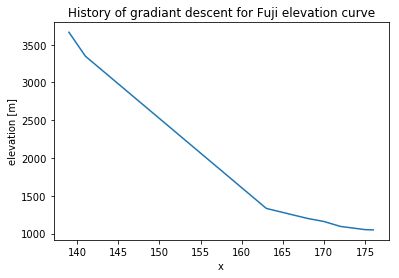

In [4]:
ALPHA = 0.1    #勾配降下法　パラメータα
X_INIT = 139    #勾配降下法　x初期値 
MAX_LOOP_COUNT = 1000    #勾配降下法　最大計算回数

history = cal_gradiant_descent(X_INIT, ALPHA, xy_array, MAX_LOOP_COUNT)
print("初期値={}、Alpha={}の時、最小値:(x={} y={}) (計算回数:{})".format(X_INIT, ALPHA, history[-1,0], history[-1,2], history.shape[0]))

plt.title('History of gradiant descent for Fuji elevation curve')
plt.xlabel('x')
plt.ylabel('elevation [m]')
plt.plot(history[:,0], history[:,2])

##### 【問題5】（アドバンス課題）並列計算
初期値によって結果が変化するわけですから、0から299まで全ての初期値の計算を行ってみるということを考えられます。
for文を使い繰り返すこともできますが、NumPyの配列を工夫して使うことで複数の計算を同時に行うことができます。ここまで作成した関数を複数の初期値が同時に計算できるように改良してください。
この改良は次のハイパーパラメータの検証にも応用することができます。

In [10]:
import math

def rounding_float_to_int(value):
    """
    少数を整数に四捨五入する
    
    parameter
    ------------------
    value :numpy array Rounding target data
    
    return
    ------------------
    value_int:numpy array Rounded data
    """
    
    rounded_value = np.empty_like(value)
    for i in range(0, len(value)):
        value_float, value_int = math.modf(value[i])
        if 0.5 <= value_float:
            value_int+=1
            
        rounded_value[i] = value_int
        
    return rounded_value


def cal_gradient_parallel_process(x, xy_list):
    """
    xでの勾配を計算
    
    Parameter
    ------------------------
    x : x of csv_file (support numpy array format)
    xy_list : array of x & elevation (1st & 4th colmun in week2_session_mtfuji_data.csv)
    
    return
    ------------------------
    grad : numpy array  cal result of gradiant @ x   
    """
    
    np.where(x <= 0, 1, x) #x<=0は計算できないのでx=1として計算
    y = np.empty_like(x)
    y_prev = np.empty_like(y)
    x_prev = np.empty_like(x)
    for i in range(x.shape[0]):
        y[i] = xy_list[int(x[i]),1]
        x_prev[i] = xy_list[int(x[i])-1,0]
        y_prev[i] = xy_list[int(x_prev[i]),1]
           
    grad = (y-y_prev)/(x-x_prev)
    return grad


def cal_gradiant_descent_parallel_process(x_init, alpha, xy_list, max_loop_count):
    """
    勾配降下法を用いてxy_listから最小値を計算し計算の履歴を返す。
    
    paramter
    ----------------
    x_init : int
    alpha : float
    xy_list : Nx2 data array
    
    return
    ----------------
    list_cal_result : list [[x_1, y_1, grad_1, cal count_1]],
                           [[x_2, y_2, grad_2, cal count_2]],
                           [[x_n, y_n, grad_n, cal count_n]]
                           
                           n=x_intの要素数。計算回数分行が追加される。
    """
    x = x_init
    #nparray_cal_result = np.arange(x_init.shape[0] * 1 * 4).reshape(x_init.shape[0], 1, 4)
    list_cal_result = [[[0] for i2 in range(4)] for i1 in range(x_init.shape[0])]
    cal_count = np.zeros(x_init.shape[0], dtype = int)
    """ 勾配から次のxを計算&結果をcal_resultにappend """
    for loop_count in range(0, max_loop_count):
        if loop_count == 0: 
            y_grad = cal_gradient_parallel_process(x, xy_list) 
            x_next = rounding_float_to_int(x - y_grad*alpha)
            for i in range(0, len(x_init)):
                #nparray_cal_result[i][0] = [x[i], xy_list[x[i],0], y_grad[i], cal_count[i]]
                list_cal_result[i] = [[x[i], xy_list[int(x[i]),1], y_grad[i], cal_count[i]]]
        else:
            y_grad = cal_gradient_parallel_process(x, xy_list) 
            x_next = rounding_float_to_int(x - y_grad*alpha)
            for i in range(0, len(x_init)):
                if x[i] != x_next[i]:
                    cal_count[i]+=1
                    #print(np.append(nparray_cal_result[i], np.array([[x[i], xy_list[x[i],1], y_grad[i], cal_count[i]]]), 0))
                    list_cal_result[i].append([x[i], xy_list[int(x[i]),1], y_grad[i], cal_count[i]])

        """ ループを抜ける条件 1.勾配が0 or 2.xの値が更新されない場合 or 3.xが0以下（計算できないため） """
        if (y_grad == 0).all() == True or (x == x_next).all() == True or (x < 0).all() == True:
            break

        x=x_next

    return list_cal_result


""" Call function """
ALPHA = 0.1   #勾配降下法　パラメータα
X_INIT = np.array([100, 136, 139, 230, 250])   #勾配降下法　x初期値 
MAX_LOOP_COUNT = 100    #勾配降下法　最大計算回数

list_cal_result = cal_gradiant_descent_parallel_process(X_INIT, ALPHA, xy_array, MAX_LOOP_COUNT)
#print(len(list_cal_result[0]))
#print(list_cal_result[0][:])
#print(list_cal_result[0][1][0], list_cal_result[0][1][1])

x_list = []
y_list = []
for i in range(0, len(list_cal_result)):    
    for row in range(0, len(list_cal_result[i])):
        x_list.append(list_cal_result[i][row][0])
        y_list.append(list_cal_result[i][row][1])
    
    print("初期値={}、Alpha={}の時、最小値:(x={} y={}) (計算回数:{})".format(list_cal_result[i][0][0], ALPHA, 
                                                                   list_cal_result[i][-1][0], 
                                                                   list_cal_result[i][-1][1], 
                                                                   list_cal_result[i][-1][3],))


初期値=100、Alpha=0.1の時、最小値:(x=82.0 y=458.66) (計算回数:10)
初期値=136、Alpha=0.1の時、最小値:(x=82.0 y=458.66) (計算回数:16)
初期値=139、Alpha=0.1の時、最小値:(x=175.0 y=1053.28) (計算回数:6)
初期値=230、Alpha=0.1の時、最小値:(x=242.0 y=462.99) (計算回数:99)
初期値=250、Alpha=0.1の時、最小値:(x=239.0 y=491.04) (計算回数:99)


##### 【問題6】（アドバンス課題）ハイパーパラメータの検証
勾配降下法の中で 
α
 はハイパーパラメータであり、前の問題でも複数試して良い結果が得られるものを探しました。これを発展させ、
α
 を一定間隔で変化させていき、それぞれの山の下り方の比較を行ってください。うまい下り方となる 
α
 を見つけるだけではなく、大きかったり小さかった時にどうなるのかを検証して説明してください。

初期値=136、Alpha=0.01の時、最小値:(x=121 y=1659.43) (計算回数:15)
初期値=136、Alpha=0.02の時、最小値:(x=115 y=1292.52) (計算回数:13)
初期値=136、Alpha=0.03の時、最小値:(x=100 y=772.58) (計算回数:21)
初期値=136、Alpha=0.04の時、最小値:(x=96 y=700.15) (計算回数:21)
初期値=136、Alpha=0.05の時、最小値:(x=81 y=443.0) (計算回数:33)
初期値=136、Alpha=0.06の時、最小値:(x=81 y=443.0) (計算回数:28)
初期値=136、Alpha=0.07の時、最小値:(x=77 y=386.64) (計算回数:28)
初期値=136、Alpha=0.08の時、最小値:(x=76 y=377.62) (計算回数:27)
初期値=136、Alpha=0.09の時、最小値:(x=76 y=377.62) (計算回数:23)
初期値=136、Alpha=0.10の時、最小値:(x=82 y=458.66) (計算回数:17)
初期値=136、Alpha=0.11の時、最小値:(x=82 y=458.66) (計算回数:14)
初期値=136、Alpha=0.12の時、最小値:(x=82 y=458.66) (計算回数:13)
初期値=136、Alpha=0.13の時、最小値:(x=82 y=458.66) (計算回数:13)
初期値=136、Alpha=0.14の時、最小値:(x=82 y=458.66) (計算回数:10)
初期値=136、Alpha=0.15の時、最小値:(x=82 y=458.66) (計算回数:10)
初期値=136、Alpha=0.16の時、最小値:(x=79 y=418.41) (計算回数:11)
初期値=136、Alpha=0.17の時、最小値:(x=79 y=418.41) (計算回数:10)
初期値=136、Alpha=0.18の時、最小値:(x=77 y=386.64) (計算回数:11)
初期値=136、Alpha=0.19の時、最小値:(x=77 y=386.64) (計算回数:10)
初期値=136、Alpha=0.20の時、最小値:(x=

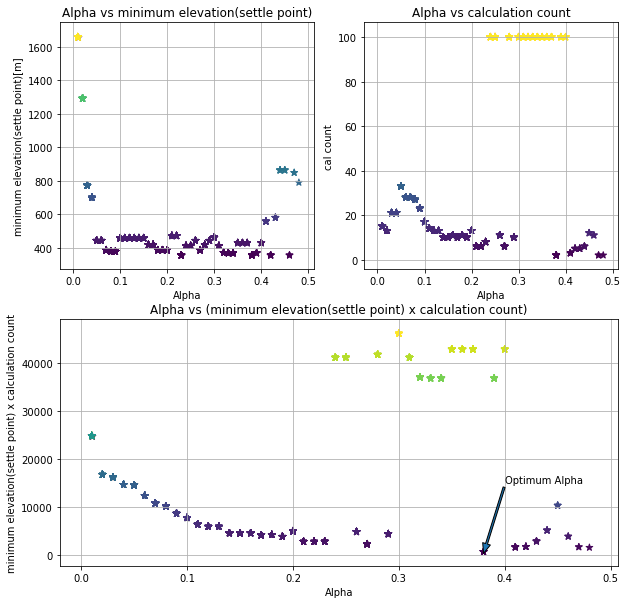

In [11]:
import math

def gen_range(value_start, value_end, value_step):
    """
    range関数を小数点が扱えるように拡張。value_startから始めてvalue_endに到達するまでvalue_stepを加え続ける。計算を実行する毎にその値を返す。
    ----------------
    Parameter
        value_start:float
        value_end:float
        value_step:float
    ----------------
    ----------------
    Return
    　　value:float value_minにvalue_stepを加えた値
    ----------------
    """
    value = value_start
    while value+value_step < value_end:
        yield value
        value += value_step
        

def rounding_float_to_int(value):
    """
    少数を整数に四捨五入する
    
    parameter
    ------------------
    value :numpy array Rounding target data
    
    return
    ------------------
    value_int:numpy array Rounded data
    """
    
    rounded_value = np.empty_like(value)
    for i in range(0, len(value)):
        value_float, value_int = math.modf(value[i])
        if 0.5 <= value_float:
            value_int+=1
            
        rounded_value[i] = value_int
        
    return rounded_value


def cal_gradient_parallel_process(x, xy_list):
    """
    xでの勾配を計算
    
    Parameter
    ------------------------
    x : x of csv_file (support numpy array format)
    xy_list : array of x & elevation (1st & 4th colmun in week2_session_mtfuji_data.csv)
    
    return
    ------------------------
    grad : numpy array  cal result of gradiant @ x   
    """
    
    np.where(x <= 0, 1, x) #x<=0は計算できないのでx=1として計算
    y = np.empty_like(x)
    y_prev = np.empty_like(y)
    x_prev = np.empty_like(x)
    for i in range(x.shape[0]):
        y[i] = xy_list[int(x[i]),1]
        x_prev[i] = xy_list[int(x[i])-1,0]
        y_prev[i] = xy_list[int(x_prev[i]),1]
           
    grad = (y-y_prev)/(x-x_prev)
    return grad


def cal_gradiant_descent_parallel_process(x_init, alpha, xy_list, max_loop_count):
    """
    勾配降下法を用いてxy_listから最小値を計算し計算の履歴を返す。
    
    paramter
    ----------------
    x_init : int
    alpha : float
    xy_list : Nx2 data array
    
    return
    ----------------
    list_cal_result : list [[x_1, y_1, grad_1, cal count_1]],
                           [[x_2, y_2, grad_2, cal count_2]],
                           [[x_n, y_n, grad_n, cal count_n]]
                           
                           n=x_intの要素数。計算回数分行が追加される。
    """
    #nparray_cal_result = np.arange(x_init.shape[0] * 1 * 4).reshape(x_init.shape[0], 1, 4)
    list_cal_result = [[[0] for i2 in range(4)] for i1 in range(alpha.shape[0])]
    cal_count = np.ones(alpha.shape[0], dtype = int)
    x = np.full(alpha.shape[0], x_init, dtype = int)
    """ 勾配から次のxを計算&結果をcal_resultにappend """
    for loop_count in range(0, max_loop_count):
        if loop_count == 0: 
            y_grad = cal_gradient_parallel_process(x, xy_list) 
            x_next = rounding_float_to_int(x - y_grad*alpha)
            for i in range(0, len(alpha)):
                #nparray_cal_result[i][0] = [x[i], xy_list[x[i],0], y_grad[i], cal_count[i]]
                list_cal_result[i] = [[x[i], xy_list[int(x[i]),1], y_grad[i], cal_count[i]]]
        else:
            y_grad = cal_gradient_parallel_process(x, xy_list) 
            x_next = rounding_float_to_int(x - y_grad*alpha)
            for i in range(0, len(alpha)):
                if x[i] != x_next[i]:
                    cal_count[i]+=1
                    #print(np.append(nparray_cal_result[i], np.array([[x[i], xy_list[x[i],1], y_grad[i], cal_count[i]]]), 0))
                    list_cal_result[i].append([x[i], xy_list[int(x[i]),1], y_grad[i], cal_count[i]])

        """ ループを抜ける条件 1.勾配が0 or 2.xの値が更新されない場合 or 3.xが0以下（計算できないため） """
        if (y_grad == 0).all() == True or (x == x_next).all() == True or (x < 0).all() == True:
            break

        x=x_next

    return list_cal_result


""" Call function """
ALPHA_MIN = 0.01    #勾配降下法　パラメータα
ALPHA_MAX = 0.5
ALPHA_STEP = 0.01
ALPHA = np.array([i for i in gen_range(ALPHA_MIN, ALPHA_MAX, ALPHA_STEP)])
X_INIT = 136            #勾配降下法　x初期値 
MAX_LOOP_COUNT = 100    #勾配降下法　最大計算回数

list_cal_result = cal_gradiant_descent_parallel_process(X_INIT, ALPHA, xy_array, MAX_LOOP_COUNT)
#print(len(list_cal_result[0]))
#print(list_cal_result[1])
#print(list_cal_result[0][1][0], list_cal_result[0][1][1])

#fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))
fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot2grid((2,2), (0,0))
ax2 = plt.subplot2grid((2,2), (0,1))
ax3 = plt.subplot2grid((2,2), (1,0), colspan=2)

ax1.set_title('Alpha vs minimum elevation(settle point)')
ax1.set_xlabel('Alpha')
ax1.set_ylabel('minimum elevation(settle point)[m]')
ax1.grid(True)

ax2.set_title('Alpha vs calculation count')
ax2.set_xlabel('Alpha')
ax2.set_ylabel('cal count')
ax2.grid(True)

ax3.set_title('Alpha vs (minimum elevation(settle point) x calculation count)')
ax3.set_xlabel('Alpha')
ax3.set_ylabel('minimum elevation(settle point) x calculation count')
ax3.grid(True)

list_x = []
list_min_elevation = []
list_cal_count = []
list_tmp = []
""" 計算結果から要素を取り出してPlot"""
for i in range(0, len(list_cal_result)):
    list_x.append(ALPHA[i])
    list_min_elevation.append(list_cal_result[i][-1][1])
    list_cal_count.append(list_cal_result[i][-1][3])
    list_tmp.append(list_cal_result[i][-1][1] * list_cal_result[i][-1][3])
    print("初期値={}、Alpha={:.2f}の時、最小値:(x={:.0f} y={}) (計算回数:{})".format(list_cal_result[i][0][0], ALPHA[i], 
                                                                   list_cal_result[i][-1][0], 
                                                                   list_cal_result[i][-1][1], 
                                                                   list_cal_result[i][-1][3]))
    ax1.scatter(list_x, list_min_elevation, s=50, c=list_min_elevation, marker='*')
    ax2.scatter(list_x, list_cal_count, s=50, c=list_cal_count, marker='*')
    ax3.scatter(list_x, list_tmp, s=50, c=list_tmp, marker='*')
    #ax3.scatter(list_cal_count, list_min_elevation, s=50, c=list_cal_count, marker='*')

ax3.annotate('Optimum Alpha', xy=(0.38, 360), xytext=(0.4, 15000), arrowprops=dict(shrink=0, width=2, headwidth=8, headlength=10))

計算の結果、条件：[初期値x=136, Alpha 0.01~0.50]においてAlpha=0.38の時、最小値y=355.68(@x=72)に最小の計算回数2回で到達するため、Alpha=0.38が最適なパラメータである。

#### 【問題7】（アドバンス課題）局所最適解
山を下りることで最終的には海（標高が0）に向かいたいですが、勾配降下法は「局所的最適解」となる地点にしか到達しない可能性があります。局所的最適解とはどういったもので、それへの対策はどういったことができるかを調査して説明してください。
言葉だけではなく、作成した関数も活用できると良いでしょう。

##### 局所的最適解とは？
ある限られた範囲の中での最適解。勾配降下法では、例えば複数の谷を持つデータを検索する場合に、本来求めたい最小値の谷ではなく別の谷に収束してしまうことが発生し得る。

##### 対策
解を検索する領域を複数に分割する（問題6のように複数の初期値に対し解を求め、その中で最適なものを選ぶ）

問題6の計算結果の場合、初期値136と139ではそれぞれ違う解が求められたが、二つを比べると初期値136で求めた解の方が妥当である。    
初期値=100、Alpha=0.1の時、最小値:(x=82.0 y=458.66) (計算回数:10)  
初期値=136、Alpha=0.1の時、最小値:(x=82.0 y=458.66) (計算回数:16)  
初期値=139、Alpha=0.1の時、最小値:(x=175.0 y=1053.28) (計算回数:6)  